In [1]:
%load_ext autoreload
%autoreload 2
import os
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import dask

import filter_hailcast_artefacts as fha

In [11]:
# ds = xr.open_dataset('/net/litho/atmosdyn2/kbrennan/data/climate/present/5min_2D/lffd20210112_0606.nz')
ds = xr.open_dataset('/net/litho/atmosdyn2/kbrennan/data/climate/present/5min_2D/lffd20210729_0606.nz')

In [12]:
# crop swiss domain
ds = ds.where((ds.lat > 44) & (ds.lat < 48) & (ds.lon > 5) & (ds.lon < 11), drop=True)

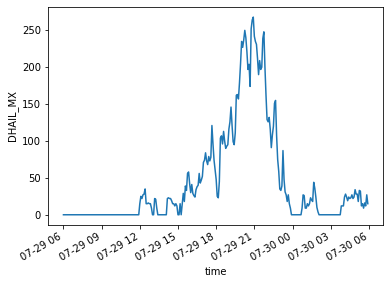

In [13]:
# count non-zero values of DHAIL_MX across all time steps
ds.DHAIL_MX.where(ds.DHAIL_MX > 0).count(dim=['rlat', 'rlon']).plot()

In [14]:
ds = fha.apply_filter(ds)

In [15]:
diff = (ds.DHAIL_MX-ds.DHAIL_MX_filtered).max(dim='time')

/tmp/ipykernel_43086/1973193797.py:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pmesh = ax.pcolormesh(ds.lon,ds.lat, ds.TOT_PREC.max(dim='time')*12,cmap='Blues',vmax=20)
/tmp/ipykernel_43086/1973193797.py:5: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(ds.lon,ds.lat, ds.DHAIL_MX.max(dim='time'), levels=[5], colors='r',linestyles='-', linewidths=2, label='HAILCAST')
/tmp/ipykernel_43086/1973193797.py:6: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contourf(ds.lon,ds.lat, diff, levels=[5,50],colors='tab:orange',alpha=0.5,label='artefact')


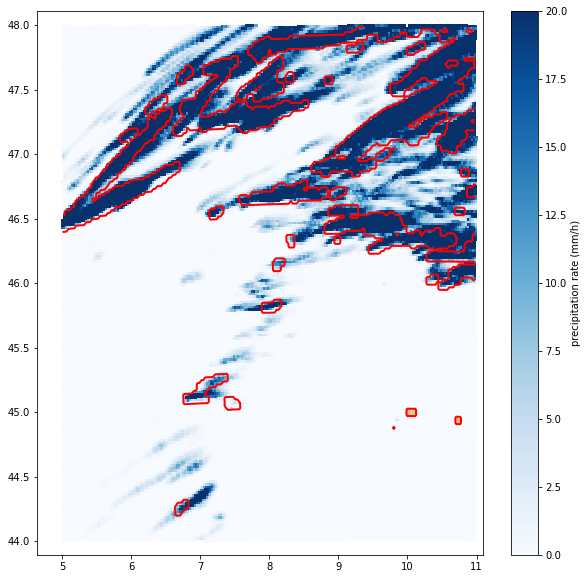

In [16]:
fig, ax = plt.subplots(figsize=(10,10))
pmesh = ax.pcolormesh(ds.lon,ds.lat, ds.TOT_PREC.max(dim='time')*12,cmap='Blues',vmax=20)
cbar = plt.colorbar(pmesh, ax=ax)
cbar.set_label('precipitation rate (mm/h)')
ax.contour(ds.lon,ds.lat, ds.DHAIL_MX.max(dim='time'), levels=[5], colors='r',linestyles='-', linewidths=2, label='HAILCAST')
ax.contourf(ds.lon,ds.lat, diff, levels=[5,50],colors='tab:orange',alpha=0.5,label='artefact')

# draw legend
